<img src='../../images/course_logo_2024.jpg'/>

<div dir="rtl">
    <h1 style="text-align: center;"> תירגול 2 ניקיון, הכנה וחקירת ניתונים</h1>
    <h1 style="text-align: center;"> Ex 2 Data preperation and exploration</h1>
</div>

# Exercise outline
1. Data Science Process
2. Using Chat GPT with QGIS
3. Data Preparation and Cleaning
4. Data Exploration Analysis (EDA)


# 1.The Data Science Process

<p>Diagram based on <a herf="https://www.youtube.com/watch?app=desktop&v=3vNvwIxTHIM">https://www.youtube.com/watch?app=desktop&v=3vNvwIxTHIM</a></p>
<div align='center'><img width =800 src='../../images/data_science_process.jpg'/></div>

# 2. Using ChatGPT with QGIS

We have 2 main options:

1. Run along with ChatGPT, Bard, Copilot
2. Use the plugin (I less recommend this option)

Example queries:

1. Select and zoom for the selected feature, concerning the selected layer in QGIS
2. Get values from the selected features, for a specific field concerning a selected layer
3. Filter for selected layer where the specific field is equal to




# 3. Data Preparation and Cleaning

In [16]:
import pandas as pd
import numpy as np

In [17]:
df = pd.read_csv('real_estate_tlv.csv')

In [18]:
df.head()

,תאריך,גוש חלקה תת חלקה,תיאור,חדרים,קומה,שטח,מחיר
0,30.11.2023,04/10/7437,דירה בבית קומות,4.0,שלישית,88.10,"₪4,270,000.00"
1,23.11.2023,7226-45-6,דירה בבית קומות,3.0,שלישית,69.00,"₪4,600,000.00"
2,05.11.2023,6918-53-38,דירה בבית קומות,2.0,שלישית,51.00,"₪3,650,000.00"
3,03.11.2023,7441-16-3,מגורים,0.0,NaN,NaN,"₪700,000.00"
4,02.11.2023,7438-13-2,דירה בבית קומות,1.0,קרקע,30.57,"₪2,050,000.00"


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   תאריך             248 non-null    object 
 1   גוש חלקה תת חלקה  248 non-null    object 
 2   תיאור             237 non-null    object 
 3   חדרים             248 non-null    float64
 4   קומה              234 non-null    object 
 5   שטח               224 non-null    float64
 6   מחיר              248 non-null    object 
dtypes: float64(2), object(5)
memory usage: 13.7+ KB


In [20]:
df.columns

Index(['תאריך', 'גוש חלקה תת חלקה', 'תיאור', 'חדרים', 'קומה', 'שטח', 'מחיר'], dtype='object')

In [21]:
# overwrite the columsn
df.columns = ['date', 'block_parcel', 'description', 'rooms' ,'floor', 'area_sqm', 'price']

In [22]:
df

,date,block_parcel,description,rooms,floor,area_sqm,price
0,30.11.2023,04/10/7437,דירה בבית קומות,4.0,שלישית,88.10,"₪4,270,000.00"
1,23.11.2023,7226-45-6,דירה בבית קומות,3.0,שלישית,69.00,"₪4,600,000.00"
2,05.11.2023,6918-53-38,דירה בבית קומות,2.0,שלישית,51.00,"₪3,650,000.00"
3,03.11.2023,7441-16-3,מגורים,0.0,NaN,NaN,"₪700,000.00"
4,02.11.2023,7438-13-2,דירה בבית קומות,1.0,קרקע,30.57,"₪2,050,000.00"
...,...,...,...,...,...,...,...
243,21.11.2022,09/01/7438,דירה בבית קומות,4.0,שלישית,119.00,"₪10,250,000.00"
244,20.11.2022,10/09/7462,דירה בבית קומות,3.0,ראשונה,64.00,"₪4,388,000.00"
245,17.11.2022,6910-29-8,דירה בבית קומות,3.0,ראשונה,63.00,"₪3,610,000.00"
246,17.11.2022,6933-21-22,דירה בבית קומות,3.0,קומה 4,56.90,"₪2,600,000.00"


In [23]:
# Deal with Date
df['date']

0      30.11.2023
1      23.11.2023
2      05.11.2023
3      03.11.2023
4      02.11.2023
          ...    
243    21.11.2022
244    20.11.2022
245    17.11.2022
246    17.11.2022
247    17.11.2022
Name: date, Length: 248, dtype: object

In [24]:
pd.to_datetime(df['date'], format="%d.%m.%Y")

0     2023-11-30
1     2023-11-23
2     2023-11-05
3     2023-11-03
4     2023-11-02
         ...    
243   2022-11-21
244   2022-11-20
245   2022-11-17
246   2022-11-17
247   2022-11-17
Name: date, Length: 248, dtype: datetime64[ns]

In [25]:
df['date'] = pd.to_datetime(df['date'], format="%d.%m.%Y")

In [26]:
# Dealing with block parcel

In [27]:
df['block_parcel'].head(25)

0      04/10/7437
1       7226-45-6
2      6918-53-38
3       7441-16-3
4       7438-13-2
5       7451-22-6
6      6907-32-23
7       6907-82-5
8      6941-123-6
9       6919-58-8
10      7429-51-7
11      6937-29-6
12     6918-61-24
13      7429-53-5
14     10/13/6912
15      6936-65-3
16     6933-91-10
17     09/09/7228
18      7462-24-5
19    6933-136-77
20      7226-23-3
21      6918-82-4
22      6911-53-3
23     03/06/7446
24      6936-50-4
Name: block_parcel, dtype: object

In [28]:
# we can deal with '-' and '/' separately
df['block_parcel'].apply(lambda p: '-' in p)

0      False
1       True
2       True
3       True
4       True
       ...  
243    False
244    False
245     True
246     True
247     True
Name: block_parcel, Length: 248, dtype: bool

In [29]:
q1 = df['block_parcel'].apply(lambda p: '-' in p)
q2 = df['block_parcel'].apply(lambda p: '/' in p)

In [30]:
q1.sum()

215

In [31]:
q2.sum()

33

In [32]:
df.loc[q1, 'block_parcel'].head()

1     7226-45-6
2    6918-53-38
3     7441-16-3
4     7438-13-2
5     7451-22-6
Name: block_parcel, dtype: object

In [33]:
df.loc[q2, 'block_parcel'].head()

0     04/10/7437
14    10/13/6912
17    09/09/7228
23    03/06/7446
40    10/05/6936
Name: block_parcel, dtype: object

In [34]:
df.loc[q1, 'block_parcel'].apply(lambda p: pd.Series(index=['block', 'parcel', 'sub_parcel'], data = p.split('-')))

,block,parcel,sub_parcel
1,7226,45,6
2,6918,53,38
3,7441,16,3
4,7438,13,2
5,7451,22,6
...,...,...,...
241,6911,71,7
242,6941,95,16
245,6910,29,8
246,6933,21,22


In [35]:
df.loc[q1, ['block', 'parcel', 'sub_parcel']] = df.loc[q1, 'block_parcel'].apply(\
        lambda p: pd.Series(index=['block', 'parcel', 'sub_parcel'], \
                    data = [int(item) for item in p.split('-')]))

In [36]:
df.head()

,date,block_parcel,description,rooms,floor,area_sqm,price,block,parcel,sub_parcel
0,2023-11-30,04/10/7437,דירה בבית קומות,4.0,שלישית,88.10,"₪4,270,000.00",NaN,NaN,NaN
1,2023-11-23,7226-45-6,דירה בבית קומות,3.0,שלישית,69.00,"₪4,600,000.00",7226.0,45.0,6.0
2,2023-11-05,6918-53-38,דירה בבית קומות,2.0,שלישית,51.00,"₪3,650,000.00",6918.0,53.0,38.0
3,2023-11-03,7441-16-3,מגורים,0.0,NaN,NaN,"₪700,000.00",7441.0,16.0,3.0
4,2023-11-02,7438-13-2,דירה בבית קומות,1.0,קרקע,30.57,"₪2,050,000.00",7438.0,13.0,2.0


In [37]:
df.loc[q2, ['block', 'parcel', 'sub_parcel']] = df.loc[q2, 'block_parcel'].apply(\
            lambda p: pd.Series(index=['block', 'parcel', 'sub_parcel'], \
                        data = [int(item) for item in p.split('/')][::-1]))

In [38]:
df

,date,block_parcel,description,rooms,floor,area_sqm,price,block,parcel,sub_parcel
0,2023-11-30,04/10/7437,דירה בבית קומות,4.0,שלישית,88.10,"₪4,270,000.00",7437.0,10.0,4.0
1,2023-11-23,7226-45-6,דירה בבית קומות,3.0,שלישית,69.00,"₪4,600,000.00",7226.0,45.0,6.0
2,2023-11-05,6918-53-38,דירה בבית קומות,2.0,שלישית,51.00,"₪3,650,000.00",6918.0,53.0,38.0
3,2023-11-03,7441-16-3,מגורים,0.0,NaN,NaN,"₪700,000.00",7441.0,16.0,3.0
4,2023-11-02,7438-13-2,דירה בבית קומות,1.0,קרקע,30.57,"₪2,050,000.00",7438.0,13.0,2.0
...,...,...,...,...,...,...,...,...,...,...
243,2022-11-21,09/01/7438,דירה בבית קומות,4.0,שלישית,119.00,"₪10,250,000.00",7438.0,1.0,9.0
244,2022-11-20,10/09/7462,דירה בבית קומות,3.0,ראשונה,64.00,"₪4,388,000.00",7462.0,9.0,10.0
245,2022-11-17,6910-29-8,דירה בבית קומות,3.0,ראשונה,63.00,"₪3,610,000.00",6910.0,29.0,8.0
246,2022-11-17,6933-21-22,דירה בבית קומות,3.0,קומה 4,56.90,"₪2,600,000.00",6933.0,21.0,22.0


In [39]:
# Description

In [40]:
df['description'].value_counts()

description
דירה בבית קומות     139
דירה בבית קומות      48
משרד                 17
חנות                  7
חנות                  5
חניה                  4
קרקע למגורים          4
מחסנים                2
מחסנים                2
דירת גג               2
קומבינציה             2
מגורים                1
משרד                  1
בית בודד              1
דירת גן               1
ללא תיכנון            1
Name: count, dtype: int64

In [41]:
df['description'].apply(lambda p: str(p).strip())

0      דירה בבית קומות
1      דירה בבית קומות
2      דירה בבית קומות
3               מגורים
4      דירה בבית קומות
            ...       
243    דירה בבית קומות
244    דירה בבית קומות
245    דירה בבית קומות
246    דירה בבית קומות
247    דירה בבית קומות
Name: description, Length: 248, dtype: object

In [42]:
df['description'].apply(lambda p: str(p).strip()).value_counts()

description
דירה בבית קומות    187
משרד                18
חנות                12
nan                 11
מחסנים               4
חניה                 4
קרקע למגורים         4
דירת גג              2
קומבינציה            2
מגורים               1
בית בודד             1
דירת גן              1
ללא תיכנון           1
Name: count, dtype: int64

In [43]:
df['description_'] = df['description'].apply(lambda p: str(p).strip())

In [44]:
df['description_'].unique()

array(['דירה בבית קומות', 'מגורים', 'חנות', 'משרד', 'מחסנים', 'nan',
       'בית בודד', 'חניה', 'קרקע למגורים', 'דירת גן', 'דירת גג',
       'קומבינציה', 'ללא תיכנון'], dtype=object)

In [45]:
df[df['description_'] == 'nan']

,date,block_parcel,description,rooms,floor,area_sqm,price,block,parcel,sub_parcel,description_
68,2023-06-12,6920-38-67,NaN,5.0,שלישית,104.0,"₪9,000,000.00",6920.0,38.0,67.0,nan
87,2023-05-14,6911-127-2,NaN,3.0,ראשונה,62.0,"₪2,296,962.00",6911.0,127.0,2.0,nan
149,2023-02-22,6904-125-3,NaN,6.0,שניה,193.0,"₪26,000,000.00",6904.0,125.0,3.0,nan
156,2023-02-15,07/02/7450,NaN,3.0,NaN,69.0,"₪4,670,000.00",7450.0,2.0,7.0,nan
191,2023-01-15,7430-37-5,NaN,4.0,שניה,NaN,"₪50,000.00",7430.0,37.0,5.0,nan
204,2023-01-02,7226-93-11,NaN,2.0,שניה,46.0,"₪3,344,335.00",7226.0,93.0,11.0,nan
205,2023-01-02,7226-93-12,NaN,2.0,שניה,48.0,"₪3,348,116.00",7226.0,93.0,12.0,nan
206,2023-01-02,7226-93-14,NaN,2.0,רביעית,48.0,"₪3,486,967.00",7226.0,93.0,14.0,nan
207,2023-01-02,7226-93-15,NaN,2.0,רביעית,49.0,"₪3,545,316.00",7226.0,93.0,15.0,nan
208,2023-01-02,7226-93-16,NaN,3.0,שניה,61.0,"₪4,216,885.00",7226.0,93.0,16.0,nan


In [46]:
df.loc[df['description_'] == 'nan', 'description_'] = 'Unknown'

In [47]:
df[df['description_'] == 'Unknown']

,date,block_parcel,description,rooms,floor,area_sqm,price,block,parcel,sub_parcel,description_
68,2023-06-12,6920-38-67,NaN,5.0,שלישית,104.0,"₪9,000,000.00",6920.0,38.0,67.0,Unknown
87,2023-05-14,6911-127-2,NaN,3.0,ראשונה,62.0,"₪2,296,962.00",6911.0,127.0,2.0,Unknown
149,2023-02-22,6904-125-3,NaN,6.0,שניה,193.0,"₪26,000,000.00",6904.0,125.0,3.0,Unknown
156,2023-02-15,07/02/7450,NaN,3.0,NaN,69.0,"₪4,670,000.00",7450.0,2.0,7.0,Unknown
191,2023-01-15,7430-37-5,NaN,4.0,שניה,NaN,"₪50,000.00",7430.0,37.0,5.0,Unknown
204,2023-01-02,7226-93-11,NaN,2.0,שניה,46.0,"₪3,344,335.00",7226.0,93.0,11.0,Unknown
205,2023-01-02,7226-93-12,NaN,2.0,שניה,48.0,"₪3,348,116.00",7226.0,93.0,12.0,Unknown
206,2023-01-02,7226-93-14,NaN,2.0,רביעית,48.0,"₪3,486,967.00",7226.0,93.0,14.0,Unknown
207,2023-01-02,7226-93-15,NaN,2.0,רביעית,49.0,"₪3,545,316.00",7226.0,93.0,15.0,Unknown
208,2023-01-02,7226-93-16,NaN,3.0,שניה,61.0,"₪4,216,885.00",7226.0,93.0,16.0,Unknown


In [48]:
df['floor'].value_counts()

floor
ראשונה                64
שלישית                42
שניה                  37
רביעית                22
קרקע                  17
חמישית                11
קומה 1                 4
קומה 4                 3
קומה 3                 3
מרתף                   3
קומה 5                 2
קרקע ובניים            1
קומה 0                 1
רביעית וגג             1
עשרים ושמונה           1
מרתף,קרקע              1
----                   1
-                      1
שמינית                 1
עשרים ושלוש            1
אחת עשרה               1
שישית                  1
קומה 6                 1
חמש עשרה               1
עשרים                  1
אח עשרה                1
ארבעים                 1
שלישית, רביעית         1
עמודים                 1
ביניים                 1
שלישית+רביעית          1
שתים עשרה,שלש עשרה     1
חמישית, שישית          1
שמונה עשרה             1
מרתף חמישי, קרקע       1
-------------          1
רביעית וחמישית         1
Name: count, dtype: int64

In [49]:
df['floor'].value_counts().to_frame().reset_index()

,floor,count
0,ראשונה,64
1,שלישית,42
2,שניה,37
3,רביעית,22
4,קרקע,17
5,חמישית,11
6,קומה 1,4
7,קומה 4,3
8,קומה 3,3
9,מרתף,3


In [50]:
translate_floor = df['floor'].value_counts().to_frame().reset_index()

In [51]:
translate_floor['floor_cat'] = translate_floor['floor'].apply(lambda p: 'Unknown' if '-' in p else np.nan)

In [52]:
translate_floor

,floor,count,floor_cat
0,ראשונה,64,NaN
1,שלישית,42,NaN
2,שניה,37,NaN
3,רביעית,22,NaN
4,קרקע,17,NaN
5,חמישית,11,NaN
6,קומה 1,4,NaN
7,קומה 4,3,NaN
8,קומה 3,3,NaN
9,מרתף,3,NaN


In [53]:
translate_floor_dict = {'ראשונה' : 'floor_1',
 'שלישית' : 'floor_3',
 'שניה'   : 'floor_2',
 'רביעית' : 'floor_4',
 'קרקע'   : 'ground',
 'חמישית' : 'floor_5',
 'קומה 5' : 'floor_5',
 'קומה 1' : 'floor_1',
 'קומה 4' : 'floor_4',
 'קומה 3' : 'floor_3',
 'מרתף'   : 'basement',
 'קומה 0' : 'ground',
 'קרקע ובניים': 'ground_floor_1',
 'רביעית וגג' :'floor_4_roof',
 'עשרים ושמונה': 'floor_28',
 'מרתף,קרקע': 'ground_basement',
 'שמינית': 'floor_8',
 'קומה 6': 'floor_6',
 'שישית': 'floor_6',
 'חמש עשרה': 'floor_15',
 'עשרים ושלוש': 'floor_23',
 'עשרים': 'floor_20',
 'אחת עשרה': 'floor_11', 
 'אח עשרה': 'floor_11',
 'ארבעים': 'floor_40',
 'שלישית, רביעית': 'floor_3_floor_4',
 'עמודים': 'floor_1',
 'ביניים': 'floor_1',
'שלישית+רביעית': 'floor_3_floor_4',
 'שתים עשרה,שלש עשרה': 'floor_12_floor_13',
 'חמישית, שישית': 'floor_5_floor_6',
 'שמונה עשרה': 'floor_18',
 'מרתף חמישי, קרקע': 'basement_floor_5_ground',
 'רביעית וחמישית': 'floor_4_floor_5'}

In [54]:
translate_floor.loc[translate_floor['floor_cat'].isna(),'floor_eng'] = translate_floor.loc[translate_floor['floor_cat'].isna(),'floor'].apply(lambda p: translate_floor_dict.get(p))

In [55]:
translate_floor

,floor,count,floor_cat,floor_eng
0,ראשונה,64,NaN,floor_1
1,שלישית,42,NaN,floor_3
2,שניה,37,NaN,floor_2
3,רביעית,22,NaN,floor_4
4,קרקע,17,NaN,ground
5,חמישית,11,NaN,floor_5
6,קומה 1,4,NaN,floor_1
7,קומה 4,3,NaN,floor_4
8,קומה 3,3,NaN,floor_3
9,מרתף,3,NaN,basement


In [56]:
{f'floor_{i}': i for i in range(0, 41)}

{'floor_0': 0,
 'floor_1': 1,
 'floor_2': 2,
 'floor_3': 3,
 'floor_4': 4,
 'floor_5': 5,
 'floor_6': 6,
 'floor_7': 7,
 'floor_8': 8,
 'floor_9': 9,
 'floor_10': 10,
 'floor_11': 11,
 'floor_12': 12,
 'floor_13': 13,
 'floor_14': 14,
 'floor_15': 15,
 'floor_16': 16,
 'floor_17': 17,
 'floor_18': 18,
 'floor_19': 19,
 'floor_20': 20,
 'floor_21': 21,
 'floor_22': 22,
 'floor_23': 23,
 'floor_24': 24,
 'floor_25': 25,
 'floor_26': 26,
 'floor_27': 27,
 'floor_28': 28,
 'floor_29': 29,
 'floor_30': 30,
 'floor_31': 31,
 'floor_32': 32,
 'floor_33': 33,
 'floor_34': 34,
 'floor_35': 35,
 'floor_36': 36,
 'floor_37': 37,
 'floor_38': 38,
 'floor_39': 39,
 'floor_40': 40}

In [57]:
floor_to_number_dict = {f'floor_{i}': i for i in range(0, 41)}

In [58]:
translate_floor['floor_number'] = translate_floor['floor_eng'].apply(lambda p: floor_to_number_dict.get(p, np.nan))

In [59]:
translate_floor

,floor,count,floor_cat,floor_eng,floor_number
0,ראשונה,64,NaN,floor_1,1.0
1,שלישית,42,NaN,floor_3,3.0
2,שניה,37,NaN,floor_2,2.0
3,רביעית,22,NaN,floor_4,4.0
4,קרקע,17,NaN,ground,NaN
5,חמישית,11,NaN,floor_5,5.0
6,קומה 1,4,NaN,floor_1,1.0
7,קומה 4,3,NaN,floor_4,4.0
8,קומה 3,3,NaN,floor_3,3.0
9,מרתף,3,NaN,basement,NaN


In [60]:
floor_str_to_number = {'ground': 0, 'basement': -1, }

In [61]:
translate_floor.loc[translate_floor['floor_number'].isna(), 'floor_number'] = translate_floor.loc[translate_floor['floor_number'].isna(), 'floor_eng'].apply(lambda p: floor_str_to_number.get(p, np.nan))

In [62]:
translate_floor[translate_floor['floor_number'].notna()][['floor','floor_number']].set_index('floor').to_dict()['floor_number']

{'ראשונה': 1.0,
 'שלישית': 3.0,
 'שניה': 2.0,
 'רביעית': 4.0,
 'קרקע': 0.0,
 'חמישית': 5.0,
 'קומה 1': 1.0,
 'קומה 4': 4.0,
 'קומה 3': 3.0,
 'מרתף': -1.0,
 'קומה 5': 5.0,
 'קומה 0': 0.0,
 'עשרים ושמונה': 28.0,
 'שמינית': 8.0,
 'עשרים ושלוש': 23.0,
 'אחת עשרה': 11.0,
 'שישית': 6.0,
 'קומה 6': 6.0,
 'חמש עשרה': 15.0,
 'עשרים': 20.0,
 'אח עשרה': 11.0,
 'ארבעים': 40.0,
 'עמודים': 1.0,
 'ביניים': 1.0,
 'שמונה עשרה': 18.0}

In [63]:
floor_heb_to_number_dict = translate_floor[translate_floor['floor_number'].notna()][['floor','floor_number']].set_index('floor').to_dict()['floor_number']

In [64]:
floor_heb_to_number_dict['שמונה עשרה']

18.0

In [65]:
df.loc[df['floor'].notna(), 'floor_number'] = df.loc[df['floor'].notna(), 'floor'].apply(lambda p: floor_heb_to_number_dict.get(p.strip()))

In [66]:
df

,date,block_parcel,description,rooms,floor,area_sqm,price,block,parcel,sub_parcel,description_,floor_number
0,2023-11-30,04/10/7437,דירה בבית קומות,4.0,שלישית,88.10,"₪4,270,000.00",7437.0,10.0,4.0,דירה בבית קומות,3.0
1,2023-11-23,7226-45-6,דירה בבית קומות,3.0,שלישית,69.00,"₪4,600,000.00",7226.0,45.0,6.0,דירה בבית קומות,3.0
2,2023-11-05,6918-53-38,דירה בבית קומות,2.0,שלישית,51.00,"₪3,650,000.00",6918.0,53.0,38.0,דירה בבית קומות,3.0
3,2023-11-03,7441-16-3,מגורים,0.0,NaN,NaN,"₪700,000.00",7441.0,16.0,3.0,מגורים,NaN
4,2023-11-02,7438-13-2,דירה בבית קומות,1.0,קרקע,30.57,"₪2,050,000.00",7438.0,13.0,2.0,דירה בבית קומות,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
243,2022-11-21,09/01/7438,דירה בבית קומות,4.0,שלישית,119.00,"₪10,250,000.00",7438.0,1.0,9.0,דירה בבית קומות,3.0
244,2022-11-20,10/09/7462,דירה בבית קומות,3.0,ראשונה,64.00,"₪4,388,000.00",7462.0,9.0,10.0,דירה בבית קומות,1.0
245,2022-11-17,6910-29-8,דירה בבית קומות,3.0,ראשונה,63.00,"₪3,610,000.00",6910.0,29.0,8.0,דירה בבית קומות,1.0
246,2022-11-17,6933-21-22,דירה בבית קומות,3.0,קומה 4,56.90,"₪2,600,000.00",6933.0,21.0,22.0,דירה בבית קומות,4.0


In [67]:
df['price'] = df['price'].apply(lambda p: p.replace('₪','').replace(',','')).astype(float)

In [68]:
df

,date,block_parcel,description,rooms,floor,area_sqm,price,block,parcel,sub_parcel,description_,floor_number
0,2023-11-30,04/10/7437,דירה בבית קומות,4.0,שלישית,88.10,4270000.0,7437.0,10.0,4.0,דירה בבית קומות,3.0
1,2023-11-23,7226-45-6,דירה בבית קומות,3.0,שלישית,69.00,4600000.0,7226.0,45.0,6.0,דירה בבית קומות,3.0
2,2023-11-05,6918-53-38,דירה בבית קומות,2.0,שלישית,51.00,3650000.0,6918.0,53.0,38.0,דירה בבית קומות,3.0
3,2023-11-03,7441-16-3,מגורים,0.0,NaN,NaN,700000.0,7441.0,16.0,3.0,מגורים,NaN
4,2023-11-02,7438-13-2,דירה בבית קומות,1.0,קרקע,30.57,2050000.0,7438.0,13.0,2.0,דירה בבית קומות,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
243,2022-11-21,09/01/7438,דירה בבית קומות,4.0,שלישית,119.00,10250000.0,7438.0,1.0,9.0,דירה בבית קומות,3.0
244,2022-11-20,10/09/7462,דירה בבית קומות,3.0,ראשונה,64.00,4388000.0,7462.0,9.0,10.0,דירה בבית קומות,1.0
245,2022-11-17,6910-29-8,דירה בבית קומות,3.0,ראשונה,63.00,3610000.0,6910.0,29.0,8.0,דירה בבית קומות,1.0
246,2022-11-17,6933-21-22,דירה בבית קומות,3.0,קומה 4,56.90,2600000.0,6933.0,21.0,22.0,דירה בבית קומות,4.0


In [69]:
df = df.drop(columns = ['block_parcel', 'description', 'floor'])

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          248 non-null    datetime64[ns]
 1   rooms         248 non-null    float64       
 2   area_sqm      224 non-null    float64       
 3   price         248 non-null    float64       
 4   block         248 non-null    float64       
 5   parcel        248 non-null    float64       
 6   sub_parcel    248 non-null    float64       
 7   description_  248 non-null    object        
 8   floor_number  222 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 17.6+ KB


In [71]:
df[df['floor_number'].notna()].info()

<class 'pandas.core.frame.DataFrame'>
Index: 222 entries, 0 to 247
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          222 non-null    datetime64[ns]
 1   rooms         222 non-null    float64       
 2   area_sqm      204 non-null    float64       
 3   price         222 non-null    float64       
 4   block         222 non-null    float64       
 5   parcel        222 non-null    float64       
 6   sub_parcel    222 non-null    float64       
 7   description_  222 non-null    object        
 8   floor_number  222 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 17.3+ KB


In [72]:
df = df[df['floor_number'].notna() & df['area_sqm'].notna()].reset_index(drop = True)

In [73]:
df

,date,rooms,area_sqm,price,block,parcel,sub_parcel,description_,floor_number
0,2023-11-30,4.0,88.10,4270000.0,7437.0,10.0,4.0,דירה בבית קומות,3.0
1,2023-11-23,3.0,69.00,4600000.0,7226.0,45.0,6.0,דירה בבית קומות,3.0
2,2023-11-05,2.0,51.00,3650000.0,6918.0,53.0,38.0,דירה בבית קומות,3.0
3,2023-11-02,1.0,30.57,2050000.0,7438.0,13.0,2.0,דירה בבית קומות,0.0
4,2023-10-26,3.0,66.70,5100000.0,7451.0,22.0,6.0,דירה בבית קומות,2.0
...,...,...,...,...,...,...,...,...,...
199,2022-11-21,4.0,119.00,10250000.0,7438.0,1.0,9.0,דירה בבית קומות,3.0
200,2022-11-20,3.0,64.00,4388000.0,7462.0,9.0,10.0,דירה בבית קומות,1.0
201,2022-11-17,3.0,63.00,3610000.0,6910.0,29.0,8.0,דירה בבית קומות,1.0
202,2022-11-17,3.0,56.90,2600000.0,6933.0,21.0,22.0,דירה בבית קומות,4.0


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          204 non-null    datetime64[ns]
 1   rooms         204 non-null    float64       
 2   area_sqm      204 non-null    float64       
 3   price         204 non-null    float64       
 4   block         204 non-null    float64       
 5   parcel        204 non-null    float64       
 6   sub_parcel    204 non-null    float64       
 7   description_  204 non-null    object        
 8   floor_number  204 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 14.5+ KB


In [75]:
df.head()

,date,rooms,area_sqm,price,block,parcel,sub_parcel,description_,floor_number
0,2023-11-30,4.0,88.10,4270000.0,7437.0,10.0,4.0,דירה בבית קומות,3.0
1,2023-11-23,3.0,69.00,4600000.0,7226.0,45.0,6.0,דירה בבית קומות,3.0
2,2023-11-05,2.0,51.00,3650000.0,6918.0,53.0,38.0,דירה בבית קומות,3.0
3,2023-11-02,1.0,30.57,2050000.0,7438.0,13.0,2.0,דירה בבית קומות,0.0
4,2023-10-26,3.0,66.70,5100000.0,7451.0,22.0,6.0,דירה בבית קומות,2.0


# 4. Data Exploration and Analysis (EDA)

In [76]:
df.describe(include = np.number)

,rooms,area_sqm,price,block,parcel,sub_parcel,floor_number
count,204.000000,204.000000,2.040000e+02,204.000000,204.000000,204.000000,204.000000
mean,2.588235,120.126961,7.806908e+06,7124.215686,53.735294,12.000000,2.754902
std,1.224567,661.617404,4.528364e+07,236.347729,44.075043,17.574893,3.416668
min,0.000000,0.000000,2.040000e+05,6904.000000,1.000000,0.000000,-1.000000
25%,2.000000,50.690000,3.275000e+06,6911.750000,20.750000,4.000000,1.000000
50%,3.000000,64.240000,4.200000e+06,6939.000000,35.000000,7.000000,2.000000
75%,3.000000,83.750000,5.357500e+06,7430.000000,77.750000,12.000000,3.000000
max,6.000000,9500.000000,6.500000e+08,7462.000000,191.000000,126.000000,28.000000


In [77]:
df.describe(include = ['O'])

,description_
count,204
unique,6
top,דירה בבית קומות
freq,173


<Axes: >

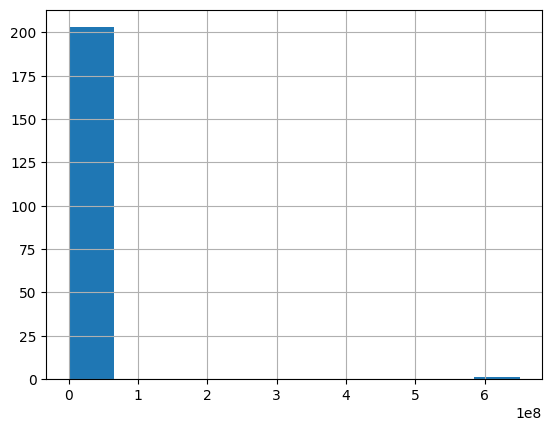

In [78]:
df.price.hist()

<Axes: >

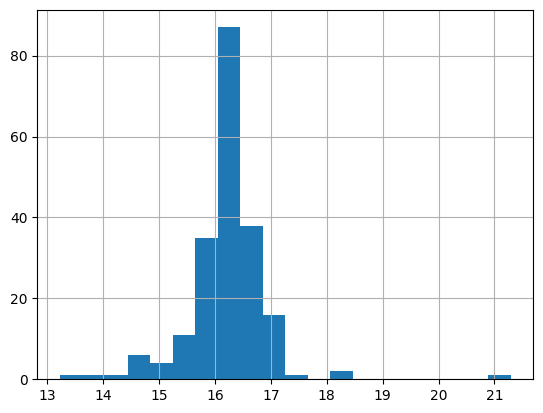

In [79]:
df.price.apply(lambda p: np.log(p)+1).hist(bins=20)

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

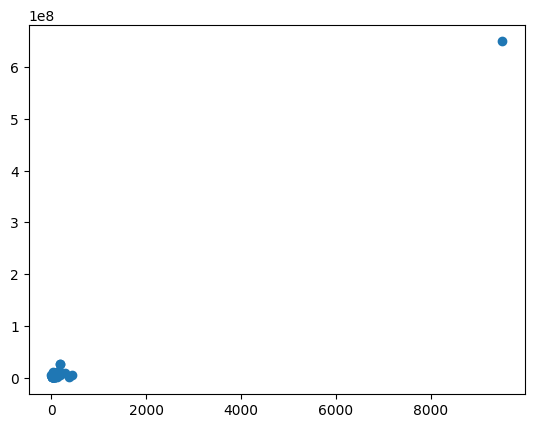

In [81]:
plt.scatter(x=df['area_sqm'], y=df['price'])

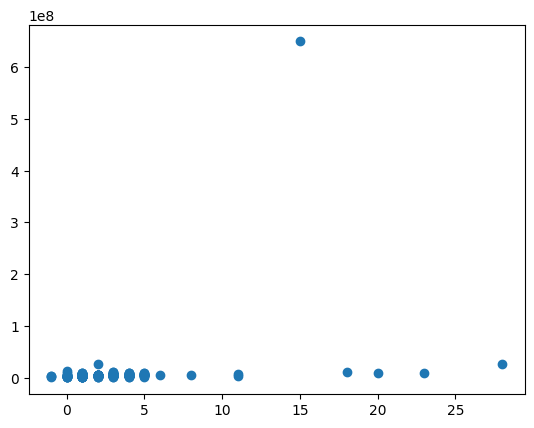

In [82]:
plt.scatter(x=df['floor_number'], y=df['price'])

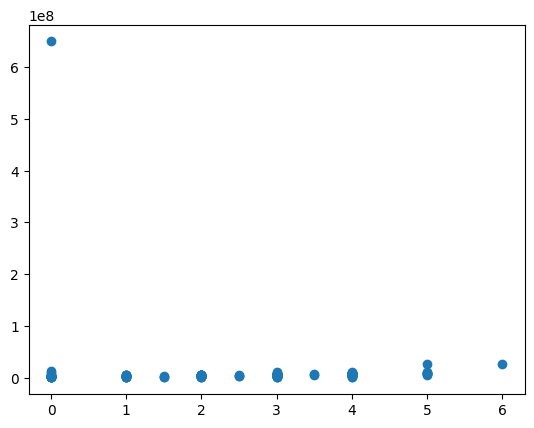

In [83]:
plt.scatter(x=df['rooms'], y=df['price'])

In [84]:
df = df[df['price'] < df['price'].max()].reset_index(drop = True)

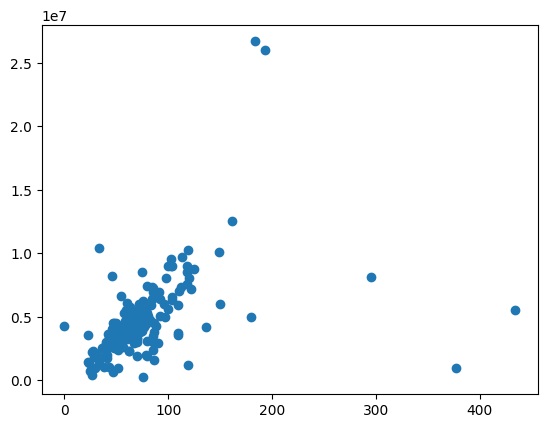

In [85]:
plt.scatter(x=df['area_sqm'], y=df['price'])

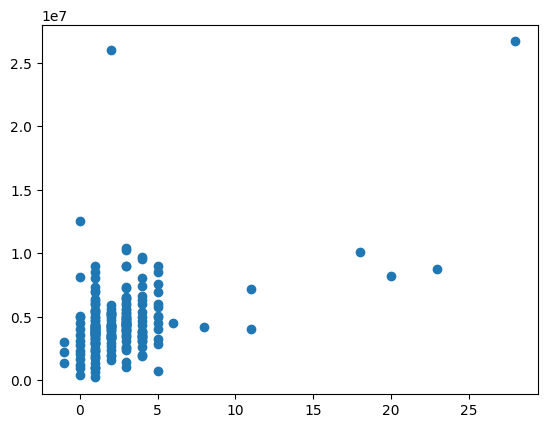

In [86]:
plt.scatter(x=df['floor_number'], y=df['price'])

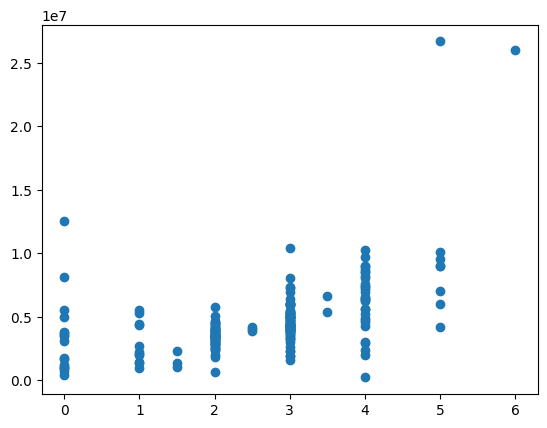

In [87]:
plt.scatter(x=df['rooms'], y=df['price'])

<Axes: >

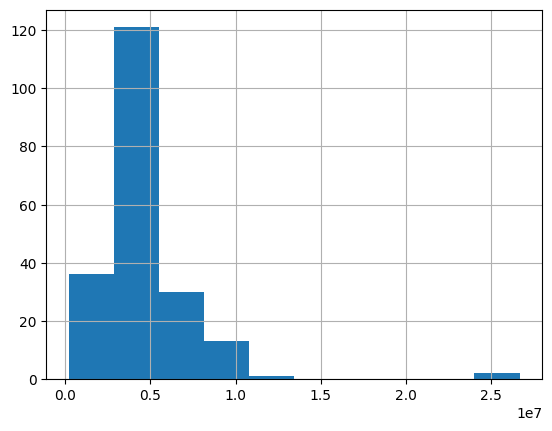

In [88]:
df.price.hist()

<Axes: >

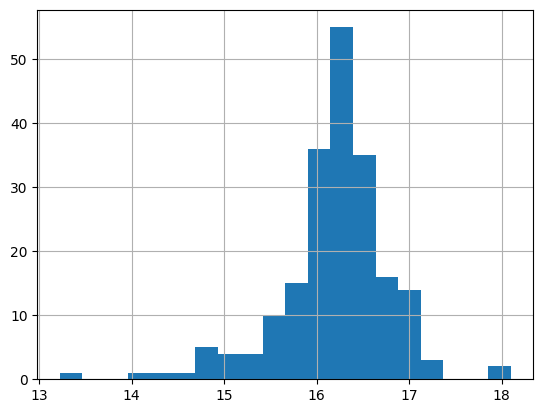

In [89]:
df.price.apply(lambda p: np.log(p)+1).hist(bins=20)

In [90]:
df['ppm'] = (df['price']/ df['area_sqm'])

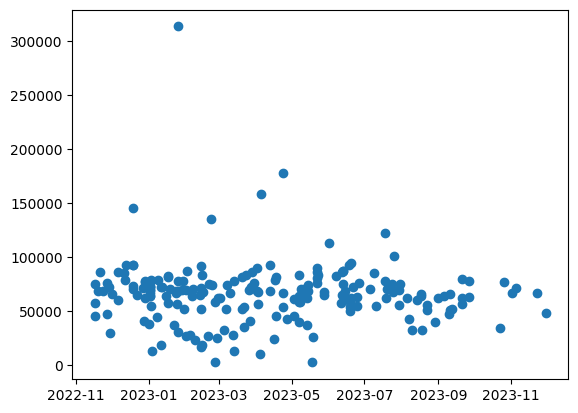

In [91]:
plt.scatter(x=df['date'], y=df['ppm'])

In [92]:
df.corr(numeric_only = True)

,rooms,area_sqm,price,block,parcel,sub_parcel,floor_number,ppm
rooms,1.000000,0.092059,0.521362,-0.079731,0.085965,0.125803,0.327603,0.286793
area_sqm,0.092059,1.000000,0.423125,-0.071801,0.088672,-0.034072,0.137699,-0.197087
price,0.521362,0.423125,1.000000,0.000564,-0.009486,0.070961,0.473927,0.541741
block,-0.079731,-0.071801,0.000564,1.000000,-0.414908,-0.170573,-0.086780,0.129535
parcel,0.085965,0.088672,-0.009486,-0.414908,1.000000,0.037618,0.043821,-0.117305
sub_parcel,0.125803,-0.034072,0.070961,-0.170573,0.037618,1.000000,0.383605,0.128844
floor_number,0.327603,0.137699,0.473927,-0.086780,0.043821,0.383605,1.000000,0.295621
ppm,0.286793,-0.197087,0.541741,0.129535,-0.117305,0.128844,0.295621,1.000000


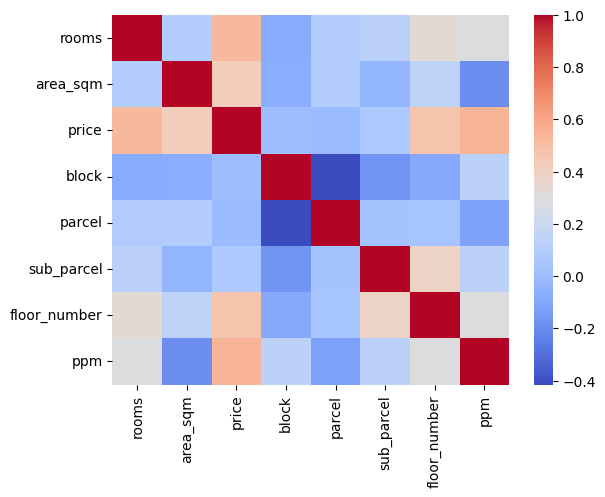

In [93]:
corr = df.corr(numeric_only = True)
sns.heatmap(corr, cmap='coolwarm')
plt.show()

## Geographic correlcation?

In [94]:
df['block_parcel'] = df.apply(lambda p: f"{p['block']:.0f}_{p['parcel']:.0f}", axis=1)

In [95]:
df.head()

,date,rooms,area_sqm,price,block,parcel,sub_parcel,description_,floor_number,ppm,block_parcel
0,2023-11-30,4.0,88.10,4270000.0,7437.0,10.0,4.0,דירה בבית קומות,3.0,48467.650397,7437_10
1,2023-11-23,3.0,69.00,4600000.0,7226.0,45.0,6.0,דירה בבית קומות,3.0,66666.666667,7226_45
2,2023-11-05,2.0,51.00,3650000.0,6918.0,53.0,38.0,דירה בבית קומות,3.0,71568.627451,6918_53
3,2023-11-02,1.0,30.57,2050000.0,7438.0,13.0,2.0,דירה בבית קומות,0.0,67059.208374,7438_13
4,2023-10-26,3.0,66.70,5100000.0,7451.0,22.0,6.0,דירה בבית קומות,2.0,76461.769115,7451_22


In [96]:
df['block_parcel'].nunique()

160

In [97]:
df['block_parcel'].value_counts()

block_parcel
7226_93     6
6933_136    5
7460_27     4
6909_35     4
7451_34     3
           ..
6941_64     1
7453_5      1
6919_47     1
6911_47     1
6911_154    1
Name: count, Length: 160, dtype: int64

In [98]:
df['block'].nunique()

43

In [99]:
df['block'].value_counts()

block
7226.0    16
6933.0    16
6911.0    15
6907.0    12
6909.0    11
6936.0    10
7451.0     8
6904.0     7
7460.0     7
7429.0     7
6941.0     7
7430.0     6
6910.0     6
7085.0     6
6937.0     5
7462.0     5
6918.0     5
6920.0     4
7103.0     3
7453.0     3
6913.0     3
7437.0     3
7446.0     3
7450.0     3
6919.0     3
7441.0     2
7227.0     2
7422.0     2
7438.0     2
7431.0     2
7440.0     2
6912.0     2
7228.0     2
7434.0     2
7435.0     2
6925.0     2
7444.0     1
7439.0     1
7442.0     1
7104.0     1
7445.0     1
7455.0     1
7245.0     1
Name: count, dtype: int64

In [100]:
df['block'].value_counts().head(15)

block
7226.0    16
6933.0    16
6911.0    15
6907.0    12
6909.0    11
6936.0    10
7451.0     8
6904.0     7
7460.0     7
7429.0     7
6941.0     7
7430.0     6
6910.0     6
7085.0     6
6937.0     5
Name: count, dtype: int64

In [101]:
df['block'].value_counts().head(15).index

Index([7226.0, 6933.0, 6911.0, 6907.0, 6909.0, 6936.0, 7451.0, 6904.0, 7460.0,
       7429.0, 6941.0, 7430.0, 6910.0, 7085.0, 6937.0],
      dtype='float64', name='block')

In [102]:
selected_blocks = df[df['block'].isin([7226.0, 6933.0, 6911.0, 6907.0, 6909.0, 6936.0, 7451.0, 6904.0, 7460.0,
       7429.0, 6941.0, 7430.0, 6910.0, 7085.0, 6937.0])]

In [103]:
selected_blocks

,date,rooms,area_sqm,price,block,parcel,sub_parcel,description_,floor_number,ppm,block_parcel
1,2023-11-23,3.0,69.00,4600000.0,7226.0,45.0,6.0,דירה בבית קומות,3.0,66666.666667,7226_45
4,2023-10-26,3.0,66.70,5100000.0,7451.0,22.0,6.0,דירה בבית קומות,2.0,76461.769115,7451_22
5,2023-10-23,0.0,109.00,3725000.0,6907.0,32.0,23.0,חנות,1.0,34174.311927,6907_32
6,2023-09-27,3.0,64.50,4075000.0,6907.0,82.0,5.0,דירה בבית קומות,1.0,63178.294574,6907_82
7,2023-09-27,2.0,44.85,3500000.0,6941.0,123.0,6.0,דירה בבית קומות,2.0,78037.904125,6941_123
...,...,...,...,...,...,...,...,...,...,...,...
196,2022-11-27,4.0,91.00,6900000.0,6936.0,63.0,1.0,דירה בבית קומות,1.0,75824.175824,6936_63
197,2022-11-24,2.0,41.64,2870000.0,6911.0,71.0,7.0,דירה בבית קומות,1.0,68924.111431,6911_71
200,2022-11-17,3.0,63.00,3610000.0,6910.0,29.0,8.0,דירה בבית קומות,1.0,57301.587302,6910_29
201,2022-11-17,3.0,56.90,2600000.0,6933.0,21.0,22.0,דירה בבית קומות,4.0,45694.200351,6933_21


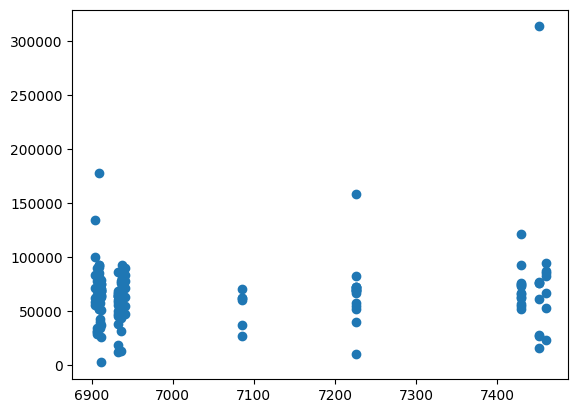

In [104]:
plt.scatter(x=selected_blocks['block'], y=selected_blocks['ppm'])

In [109]:
# What is next??
# Widget exploration
#https://colab.research.google.com/drive/1ltcvW7D9bUtTcSJkfC1Ja-yWusZi2zWY

#ask chat GPT about how to explor housing prices

#Follow this guy:
# https://www.youtube.com/watch?v=I3FBJdiExcg
# https://www.youtube.com/watch?v=NQQ3DRdXAXE
# https://www.kaggle.com/code/kenjee/housing-prices-example-with-video-walkthrough
# https://www.kaggle.com/code/samratp/boston-housing-prices-evaluation-validation
# https://seaborn.pydata.org/tutorial/distributions.html


In [105]:
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objects as go

In [106]:
# Fit a normal distribution to the SalePrice data
mu, sigma = stats.norm.fit(df['price'])

In [107]:
# Create a histogram of the SalePrice column
hist_data = go.Histogram(x=df['price'], nbinsx=50, name="Histogram", opacity=0.75, histnorm='probability density', marker=dict(color='purple'))

# Calculate the normal distribution based on the fitted parameters
x_norm = np.linspace(df['price'].min(), df['price'].max(), 100)
y_norm = stats.norm.pdf(x_norm, mu, sigma)

# Create the normal distribution overlay
norm_data = go.Scatter(x=x_norm, y=y_norm, mode="lines", name=f"Normal dist. (μ={mu:.2f}, σ={sigma:.2f})", line=dict(color="green"))

# Combine the histogram and the overlay
fig = go.Figure(data=[hist_data, norm_data])

# Set the layout for the plot
fig.update_layout(
    title="SalePrice Distribution",
    xaxis_title="SalePrice",
    yaxis_title="Density",
    legend_title_text="Fitted Normal Distribution",
    plot_bgcolor='rgba(32, 32, 32, 1)',
    paper_bgcolor='rgba(32, 32, 32, 1)',
    font=dict(color='white')
)


In [108]:
fig.show(renderer='iframe')